In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm

In [44]:
df = pd.read_csv('data/avocado_prices/avocado.csv')

df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")

df = df.sort_values(by='Date',ascending=True)

In [45]:
agg_df = df.groupby(by=['type','Date'])['AveragePrice'].agg(['mean','std'])
agg_df = agg_df.reset_index()

In [46]:
conv_df =  agg_df[agg_df.reset_index()['type'] == 'conventional']
x = np.arange(len(conv_df))
conv_y = conv_df['mean'].values
conv_std = conv_df['std'].values

org_df =  agg_df[agg_df.reset_index()['type'] == 'organic']
org_y = org_df['mean'].values
org_std = org_df['std'].values

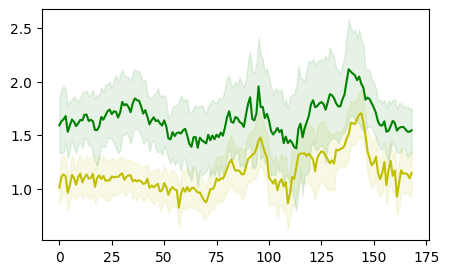

In [48]:
plt.figure(figsize=(5,3))
plt.plot(x, conv_y,'y')
plt.plot(x, org_y,'g')
plt.fill_between(x, conv_y-conv_std, conv_y+conv_std, color='y', alpha=.1)
plt.fill_between(x, org_y-org_std, org_y+org_std, color='g', alpha=.1)


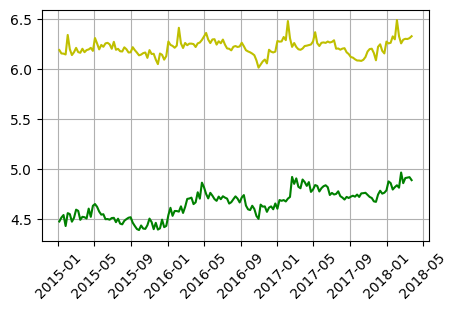

In [40]:
import matplotlib.dates as mdates

tv_df = df.groupby(by=['type','Date'])['Total Volume'].agg(['mean','std'])
tv_df = tv_df.reset_index() 

conv_df =  tv_df[tv_df.reset_index()['type'] == 'conventional']
x = conv_df['Date']
conv_y = np.log10(conv_df['mean'].values)

plt.figure(figsize=(5,3))
plt.plot(x, conv_y,'y')
plt.tick_params(axis='x', labelrotation=45)

org_df =  tv_df[tv_df.reset_index()['type'] == 'organic']
org_y = np.log10(org_df['mean'].values)

plt.plot(x, org_y,'g')
plt.grid()


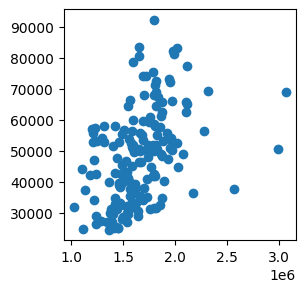

pearsons correlation for conv and org avocados: 
[[1.         0.42934799]
 [0.42934799 1.        ]]


In [38]:
plt.figure(figsize=(3,3))
plt.scatter(tv_df[tv_df['type']=='conventional']['mean'],tv_df[tv_df['type']=='organic']['mean'])
plt.show()

print(f"pearsons correlation for conv and org avocados: \n"
f"{np.corrcoef(tv_df[tv_df['type']=='conventional']['mean'].values,tv_df[tv_df['type']=='organic']['mean'].values)}")

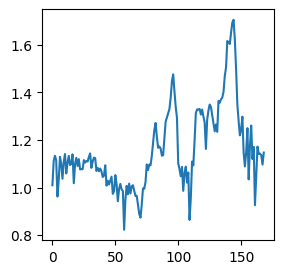

<Figure size 300x300 with 0 Axes>

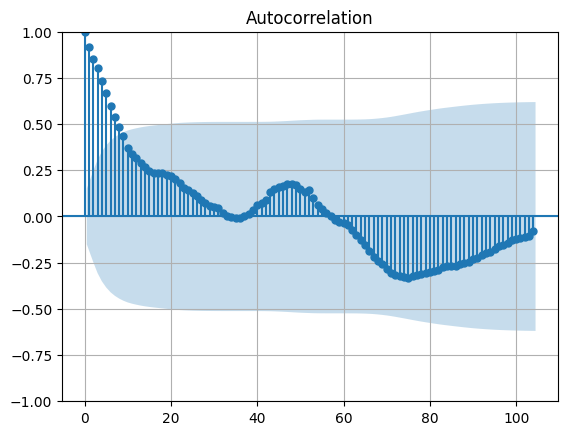

In [77]:
# acf
conv_df =  agg_df[agg_df.reset_index()['type'] == 'conventional']
x = np.arange(len(conv_df))
conv_y = conv_df['mean'].values

plt.figure(figsize=(3,3))
plt.plot(conv_y)
plt.show()

plt.figure(figsize=(3,3))
sm.graphics.tsaplots.plot_acf(conv_y, lags=104)
plt.grid()
plt.show()

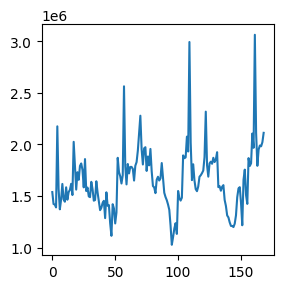

<Figure size 300x300 with 0 Axes>

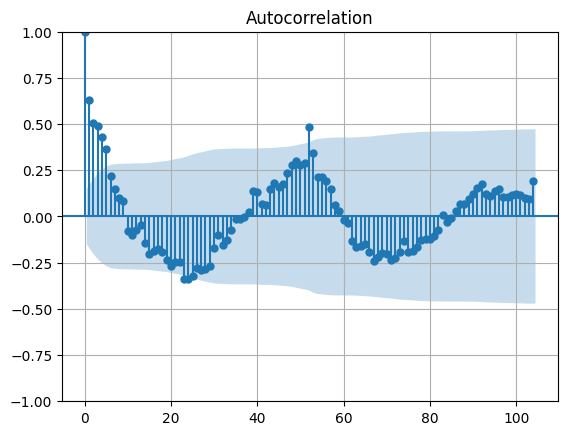

In [81]:
# acf
conv_df =  tv_df[tv_df.reset_index()['type'] == 'conventional']
conv_df = conv_df['mean'].values

plt.figure(figsize=(3,3))
plt.plot(conv_df)
plt.show()

plt.figure(figsize=(3,3))
sm.graphics.tsaplots.plot_acf(conv_df, lags=104)
plt.grid()
plt.show()

selected lambda: -0.408809901772493


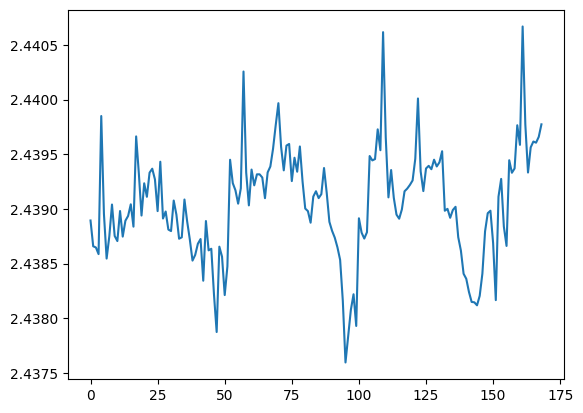

In [92]:
from scipy import stats

trans_conv_df, lmbda  = stats.boxcox(conv_df)
print(f'selected lambda: {lmbda}')
plt.plot(trans_conv_df)
plt.show()

In [ ]:
# VERY QUICKLY (2 nov) new nb
# think on single or multi branch and how to divide them + cross validation
# think on single or multi step forecasting, and past horizon size

# report mae, rmse, mape in a unified manner across models and datasets
# use avocado, energy, tourism first, and later on m4
# implement mean, naive, seasonal naive, linear regression, decomposition
# analyze residuals for some fitted models